#Цель работы

Провести статистический анализ специальных затрат, связанных с экологическими инновациями, по видам экологической деятельности, для оценки структуры, распределения и ключевых характеристик этих инвестиций.

# Основная часть

## 1.1 Описание данных

- Источник данных: данные, которые будут использоваться в анализе, были взяты из раздела «Инновации», таблица «Специальные затраты, связанные с экологическими инновациями, по видам экономической деятельности».
- Фактическое содержание данных: статистика представляет собой объем финансовых инвестиций, направленных организациями на внедрение и разработку экологических инноваций. Под «экологическими инновациями» понимается создание и усовершенствование продуктов, процессов и прочей деятельности, основной целью которых является рациональное использование природных ресурсов и повышение эффективности работы, связанной с окружающей средой.
- Анализируемый набор данных: для исследования был выбран один количественный показатель – «Специальные затраты, связанные с экологическими инновациями» за 2015 год (3я страница). Данный год является последним в предоставляемой статистике.
- Количество данных: исходные данные были структурированы по видам экономической деятельности с агрегированными значениями затрат по каждой категории. Для удобства исследования были исключены строки, содержащие итоговые суммы по группам видов деятельности, и столбцы, которые не относились к рассматриваемому году. Также были удалены все виды экономической деятельности, по которым значения были представлены символами «-» (отсутствие явления) или «…» (отсутствие данных). В итоге анализируемая выборка включает в себя 19 видов экономической деятельности.
- Единица измерения: затраты измеряются в миллионах рублей.


In [227]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import skew, kurtosis
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


In [228]:
df = pd.read_csv('kr_1_2010_2015.csv', sep=';', decimal=',')

categories = df.iloc[:, 0].tolist()
values_2010 = df.iloc[:, 1].tolist()
values_2013 = df.iloc[:, 2].tolist()
values_2015 = df.iloc[:, 3].tolist()

values_2010 = [x for x in values_2010 if x != '' and not pd.isna(x)]
values_2013 = [x for x in values_2013 if x != '' and not pd.isna(x)]
values_2015 = [x for x in values_2015 if x != '' and not pd.isna(x)]

## 1.2 Формальное представление данных

Как было сказано ранее, для удобства исследования, формат данных был немного подкорректирован. Были сделаны следующие этапы:

1.	Удалены строки, отвечающие за итоговые суммы и разделения по видам.

2.	Удалены столбцы, не имеющие отношения к анализированным годам.

3.	Удалены значения, имеющие «-» или «…», если они осутствовали в 3 годах
После редактирования таблица приняла корректный вид для анализа (таблица 1).


In [229]:
df.head(30)

,Наименование,2010,2013,2015
0,добыча топливно-энергетических полезных ископа...,385.5,444.3,691.7
1,"добыча полезных ископаемых, кроме топливно-эне...",3.8,10.6,22.9
2,"производство пищевых продуктов, включая напитк...",2.7,8.0,4.4
3,текстильное и швейное производство,0.8,0.3,NaN
4,"производство кожи, изделий из кожи и производс...",9.6,13.3,NaN
5,обработка древесины и производство изделий из ...,15.6,7.9,10.9
6,целлюлозно-бумажное производство; издательская...,89.2,36.6,247.0
7,производство кокса и нефтепродуктов,198.1,363.2,780.9
8,химическое производство,73.2,24.7,40.8
9,производство резиновых и пластмассовых изделий,3.1,2.5,0.8


## 1.3 Наглядное представление данных

Первым этапом статистического анализа является визуальное представление данных, которое позволяет получить общее представление о структуре и характере распределения изучаемой совокупности. Для визуализации специальных затрат на экологические инновации по видам экономической деятельности за 2015 год построена вертикальная столбчатая диаграмма (диаграмма 1). Легенда в данном случае не используется, так как у каждого столбца присутствует подпись, наклоненная на 45 градусов для читабельности.

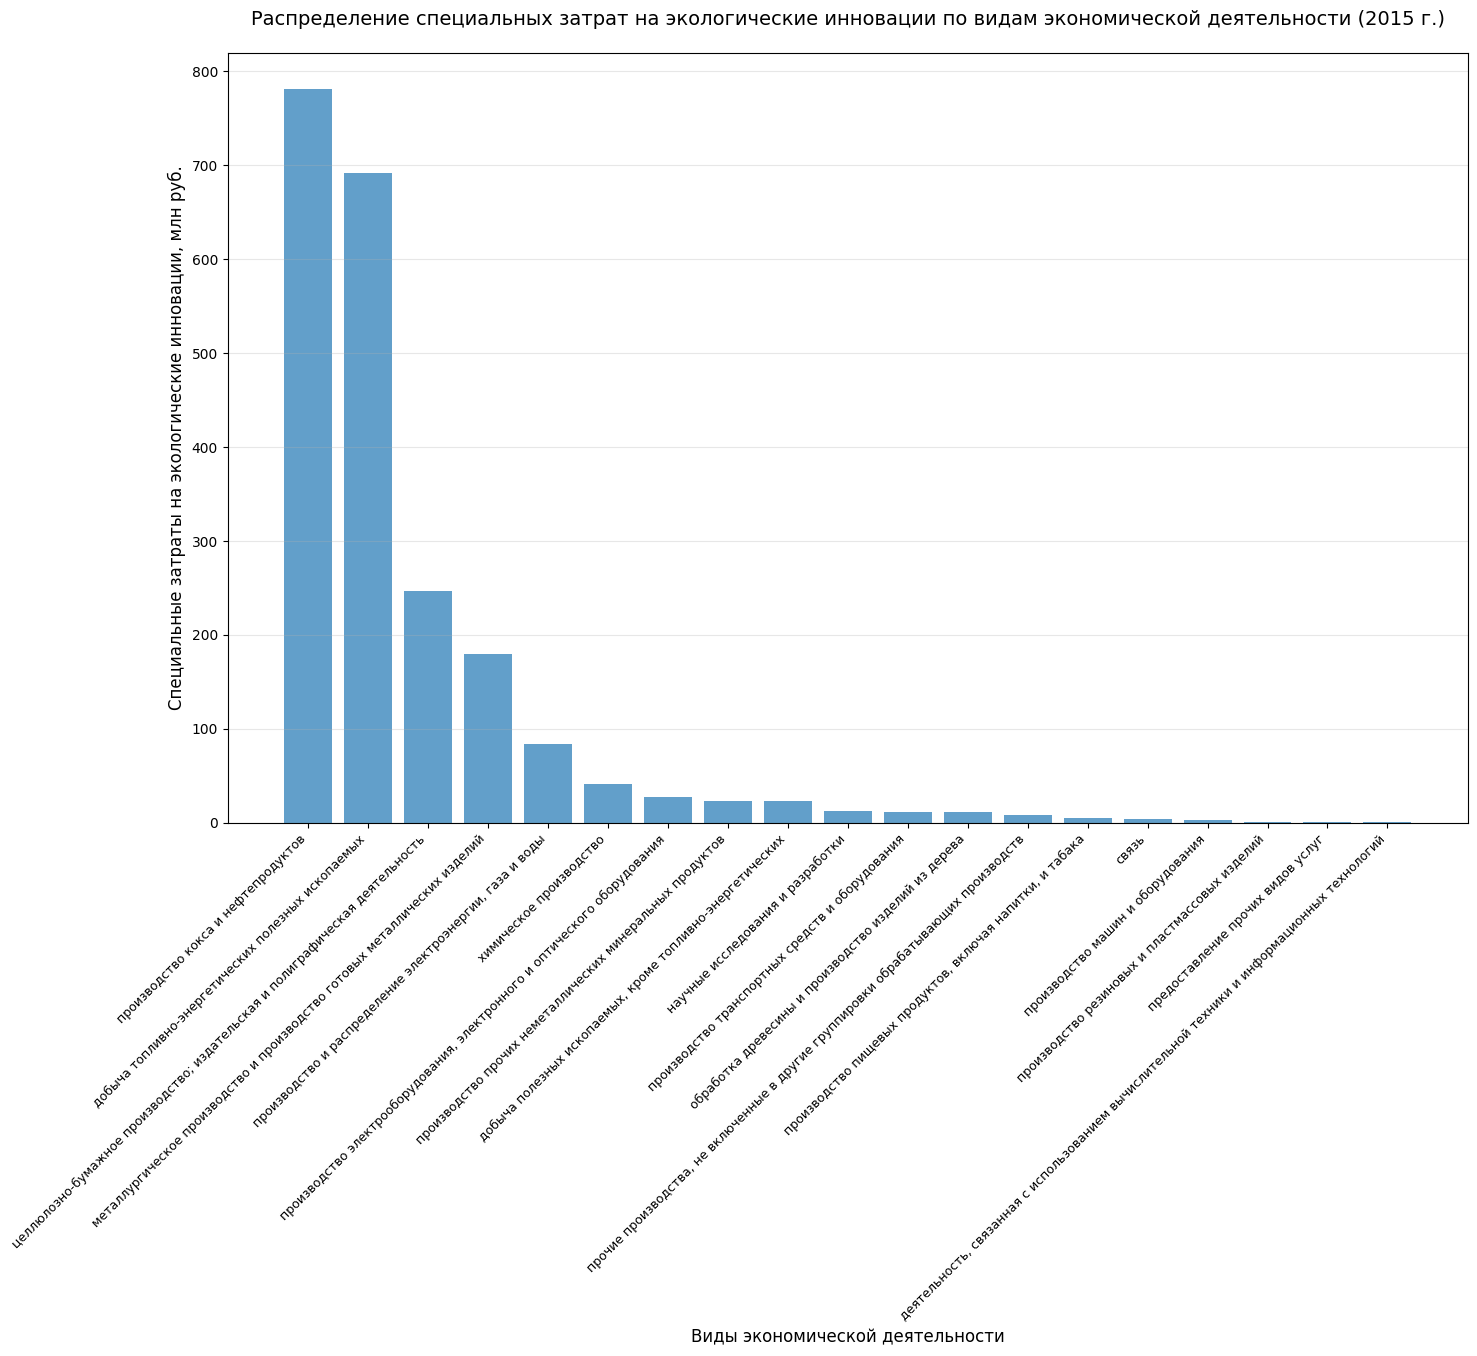

In [230]:
df_clean = df.copy()
df_clean['2015'] = pd.to_numeric(df_clean['2015'], errors='coerce')

df_2015 = df_clean.dropna(subset=['2015'])

sorted_df = df_2015.sort_values('2015', ascending=False)

plt.figure(figsize=(16, 10))

bars = plt.bar(range(len(sorted_df)), sorted_df['2015'], alpha=0.7)

plt.xticks(range(len(sorted_df)), sorted_df['Наименование'], fontsize=9, rotation=45, ha='right')
plt.ylabel('Специальные затраты на экологические инновации, млн руб.', fontsize=12)
plt.xlabel('Виды экономической деятельности', fontsize=12)
plt.title('Распределение специальных затрат на экологические инновации по видам экономической деятельности (2015 г.)', fontsize=14, pad=20)

plt.grid(axis='y', alpha=0.3)

plt.show()

## 1.4 Числовые оценки числовых характеристик

In [231]:
def descriptive_stats(data):
    stats = {}

    # Преобразуем данные в числовой формат (заменяем запятые на точки)
    if isinstance(data[0], str):
        data = [float(x.replace(',', '.')) for x in data]

    data = np.array(data)

    # 3.1 Среднее выборочное
    stats['mean'] = np.mean(data)

    # 3.2 Выборочная дисперсия
    stats['var_biased'] = np.var(data)          # смещённая
    stats['var_unbiased'] = np.var(data, ddof=1)  # несмещённая

    # 3.3 Среднеквадратичное отклонение
    stats['std'] = np.sqrt(stats['var_unbiased'])

    # 3.4 Медиана
    stats['median'] = np.median(data)

    # 3.5 Выборочное абсолютное отклонение от медианы
    stats['mad'] = np.mean(np.abs(data - stats['median']))

    # 3.6 Квартили
    stats['q1'] = np.percentile(data, 25)
    stats['q2'] = np.percentile(data, 50)  # медиана
    stats['q3'] = np.percentile(data, 75)

    # 3.7 Интерквартильная широта
    stats['iqr'] = stats['q3'] - stats['q1']

    # 3.8 Полусумма выборочных квартилей
    stats['q_mid'] = (stats['q1'] + stats['q3']) / 2

    # 3.9 Экстремальные элементы
    stats['min'] = np.min(data)
    stats['max'] = np.max(data)

    # 3.10 Размах выборки
    stats['range'] = stats['max'] - stats['min']

    # 3.11 Полусумма экстремальных элементов
    stats['mid_range'] = (stats['min'] + stats['max']) / 2

    # 3.12 Выборочная оценка асимметрии
    stats['skewness'] = skew(data)

    # 3.13 Выборочная оценка эксцесса
    stats['kurtosis'] = kurtosis(data)  # избыточный эксцесс (0 для нормального распределения)

    return stats


# Вычисление статистик
stats_eco_innov = descriptive_stats(values_2015)

print(f"3.1. Среднее выборочное: {stats_eco_innov['mean']:.1f} млн руб.")
print(f"3.2. Выборочная дисперсия:")
print(f"    - Смещенная: {stats_eco_innov['var_biased']:.1f}")
print(f"    - Несмещенная: {stats_eco_innov['var_unbiased']:.1f}")
print(f"3.3. Выборочное среднее квадратичное отклонение: {stats_eco_innov['std']:.1f} млн руб.")
print(f"3.4. Медиана: {stats_eco_innov['median']:.1f} млн руб.")
print(f"3.5. Выборочное абсолютное отклонение: {stats_eco_innov['mad']:.1f} млн руб.")
print(f"3.6. Квартили:")
print(f"    - Q₁ (25-й процентиль): {stats_eco_innov['q1']:.1f} млн руб.")
print(f"    - Q₂ (медиана): {stats_eco_innov['q2']:.1f} млн руб.")
print(f"    - Q₃ (75-й процентиль): {stats_eco_innov['q3']:.1f} млн руб.")
print(f"3.7. Интерквартильная широта: {stats_eco_innov['iqr']:.1f} млн руб.")
print(f"3.8. Полусумма выборочных квартилей: {stats_eco_innov['q_mid']:.1f} млн руб.")
print(f"3.9. Экстремальные элементы:")
print(f"    - Минимум: {stats_eco_innov['min']:.1f} млн руб.")
print(f"    - Максимум: {stats_eco_innov['max']:.1f} млн руб.")
print(f"3.10. Размах выборки: {stats_eco_innov['range']:.1f} млн руб.")
print(f"3.11. Полусумма экстремальных элементов: {stats_eco_innov['mid_range']:.1f} млн руб.")
print(f"3.12. Выборочная оценка асимметрии: {stats_eco_innov['skewness']:.2f}")
print(f"3.13. Выборочная оценка эксцесса: {stats_eco_innov['kurtosis']:.2f}")

3.1. Среднее выборочное: 113.2 млн руб.
3.2. Выборочная дисперсия:
    - Смещенная: 49928.1
    - Несмещенная: 52701.9
3.3. Выборочное среднее квадратичное отклонение: 229.6 млн руб.
3.4. Медиана: 12.1 млн руб.
3.5. Выборочное абсолютное отклонение: 108.1 млн руб.
3.6. Квартили:
    - Q₁ (25-й процентиль): 4.2 млн руб.
    - Q₂ (медиана): 12.1 млн руб.
    - Q₃ (75-й процентиль): 62.2 млн руб.
3.7. Интерквартильная широта: 58.0 млн руб.
3.8. Полусумма выборочных квартилей: 33.2 млн руб.
3.9. Экстремальные элементы:
    - Минимум: 0.2 млн руб.
    - Максимум: 780.9 млн руб.
3.10. Размах выборки: 780.7 млн руб.
3.11. Полусумма экстремальных элементов: 390.6 млн руб.
3.12. Выборочная оценка асимметрии: 2.26
3.13. Выборочная оценка эксцесса: 3.60


## 1.5	Оценка плотности распределения

Для визуальной оценки характера распределения специальных затрат на экологические инновации была построена гистограмма с наложенной кривой плотности распределения

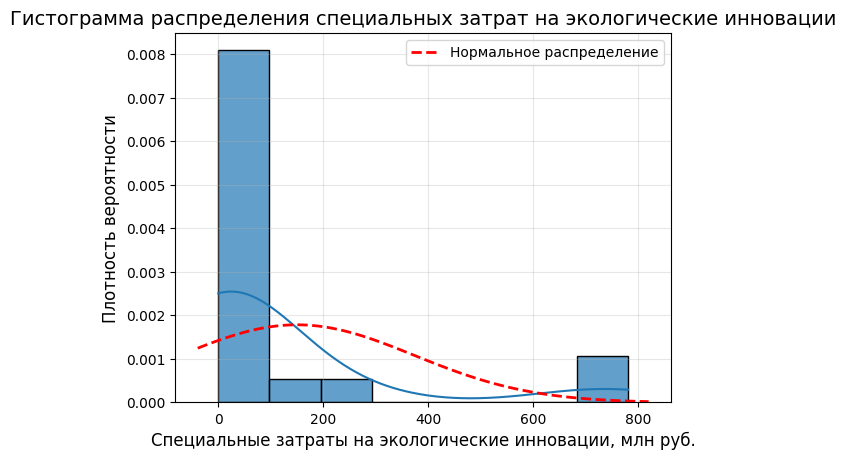

In [232]:
sns.histplot(values_2015, bins=8, kde=True, stat='density', alpha=0.7)
plt.xlabel('Специальные затраты на экологические инновации, млн руб.', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Гистограмма распределения специальных затрат на экологические инновации', fontsize=14)
plt.grid(alpha=0.3)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(values), np.std(values_2015))
plt.plot(x, p, 'r--', linewidth=2, label='Нормальное распределение')

plt.legend()
plt.show()

## 1.6	Интервальные оценки числовых характеристик

In [233]:
shapiro_stat, shapiro_p = stats.shapiro(values_2015)
ks_stat, ks_p = stats.kstest(values, 'norm', args=(np.mean(values), np.std(values)))

print("Результаты проверки гипотезы о нормальности распределения:")
print(f"Критерий Шапиро-Уилка: p-value = {shapiro_p:.6f}")
print(f"Критерий Колмогорова-Смирнова: p-value = {ks_p:.6f}")

log_values = np.log(values)
shapiro_log_stat, shapiro_log_p = stats.shapiro(log_values)

print(f"Проверка лог-нормальности (Шапиро-Уилка для логарифмов): p-value = {shapiro_log_p:.6f}")


Результаты проверки гипотезы о нормальности распределения:
Критерий Шапиро-Уилка: p-value = 0.000001
Критерий Колмогорова-Смирнова: p-value = 0.690668
Проверка лог-нормальности (Шапиро-Уилка для логарифмов): p-value = 0.407735


Базовые статистики:
n = 19, Среднее = 113.2 млн руб.
Стандартное отклонение = 229.6 млн руб., Медиана = 12.1 млн руб.

Доверительные интервалы (95%):
Среднее: [2.6; 223.9] млн руб. (параметрический)
Среднее: [25.7; 224.0] млн руб. (бутстреп)
Медиана: [4.4; 40.8] млн руб.
Ст. отклонение: [173.5; 339.5] млн руб.
Дисперсия: [30090.2; 115254.9]


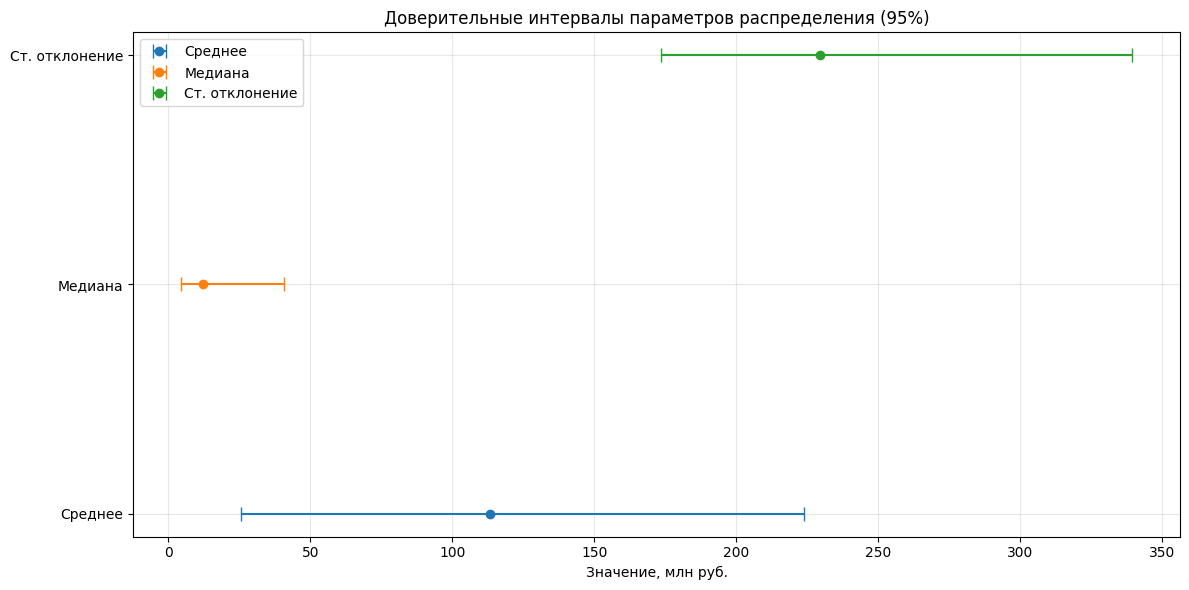

In [234]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Базовые статистики
n = len(values_2015)
mean = np.mean(values_2015)
std = np.std(values_2015, ddof=1)
median = np.median(values_2015)

print("Базовые статистики:")
print(f"n = {n}, Среднее = {mean:.1f} млн руб.")
print(f"Стандартное отклонение = {std:.1f} млн руб., Медиана = {median:.1f} млн руб.")

# Доверительные интервалы
t_critical = stats.t.ppf(0.975, n-1)
se_mean = std / np.sqrt(n)
ci_mean = [mean - t_critical * se_mean, mean + t_critical * se_mean]

chi2_lower, chi2_upper = stats.chi2.ppf(0.975, n-1), stats.chi2.ppf(0.025, n-1)
ci_std = [np.sqrt((n-1) * std**2 / chi2_lower), np.sqrt((n-1) * std**2 / chi2_upper)]
ci_var = [(n-1) * std**2 / chi2_lower, (n-1) * std**2 / chi2_upper]

# Бутстреп
def bootstrap_ci(data, n_bootstrap=10000):
    boot_means, boot_medians = [], []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, len(data), replace=True)
        boot_means.append(np.mean(sample))
        boot_medians.append(np.median(sample))
    return (np.percentile(boot_means, [2.5, 97.5]),
            np.percentile(boot_medians, [2.5, 97.5]))

ci_mean_boot, ci_median_boot = bootstrap_ci(values_2015)

# Вывод результатов
print(f"\nДоверительные интервалы (95%):")
print(f"Среднее: [{ci_mean[0]:.1f}; {ci_mean[1]:.1f}] млн руб. (параметрический)")
print(f"Среднее: [{ci_mean_boot[0]:.1f}; {ci_mean_boot[1]:.1f}] млн руб. (бутстреп)")
print(f"Медиана: [{ci_median_boot[0]:.1f}; {ci_median_boot[1]:.1f}] млн руб.")
print(f"Ст. отклонение: [{ci_std[0]:.1f}; {ci_std[1]:.1f}] млн руб.")
print(f"Дисперсия: [{ci_var[0]:.1f}; {ci_var[1]:.1f}]")

# Горизонтальная визуализация
plt.figure(figsize=(12, 6))
parameters = ['Среднее', 'Медиана', 'Ст. отклонение']
intervals = [ci_mean_boot, ci_median_boot, ci_std]
point_estimates = [mean, median, std]

for i, (param, interval, point) in enumerate(zip(parameters, intervals, point_estimates)):
    plt.errorbar(point, i, xerr=[[point - interval[0]], [interval[1] - point]],
                 fmt='o', capsize=5, label=param)

plt.yticks(range(3), parameters)
plt.xlabel('Значение, млн руб.')
plt.title('Доверительные интервалы параметров распределения (95%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 2.1 Сравнение с другими годами


2010 год:
  Общая сумма: 1,178.1 млн руб.
  Среднее значение: 62.0 млн руб.
  Медиана: 11.8 млн руб.
  Стандартное отклонение: 100.4 млн руб.

2013 год:
  Общая сумма: 1,150.1 млн руб.
  Среднее значение: 57.5 млн руб.
  Медиана: 11.9 млн руб.
  Стандартное отклонение: 120.7 млн руб.

2015 год:
  Общая сумма: 2,151.7 млн руб.
  Среднее значение: 113.2 млн руб.
  Медиана: 12.1 млн руб.
  Стандартное отклонение: 229.6 млн руб.


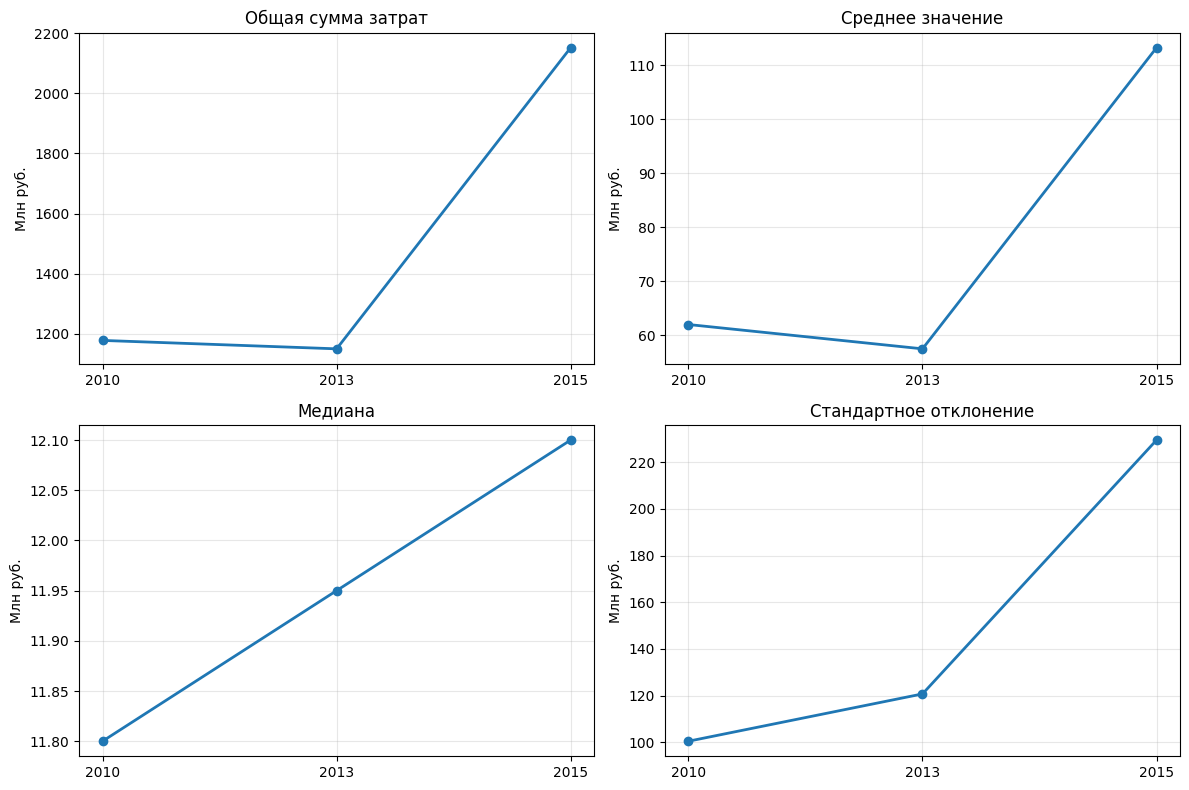

In [235]:
def calculate_basic_stats(values, year_name):
    return {
        'Год': year_name,
        'Общая_сумма': np.sum(values),
        'Среднее': np.mean(values),
        'Медиана': np.median(values),
        'Стандартное_отклонение': np.std(values, ddof=1)
    }

stats_2010 = calculate_basic_stats(values_2010, '2010')
stats_2013 = calculate_basic_stats(values_2013, '2013')
stats_2015 = calculate_basic_stats(values_2015, '2015')
for stats in [stats_2010, stats_2013, stats_2015]:
    print(f"\n{stats['Год']} год:")
    print(f"  Общая сумма: {stats['Общая_сумма']:,.1f} млн руб.")
    print(f"  Среднее значение: {stats['Среднее']:,.1f} млн руб.")
    print(f"  Медиана: {stats['Медиана']:,.1f} млн руб.")
    print(f"  Стандартное отклонение: {stats['Стандартное_отклонение']:,.1f} млн руб.")

plt.figure(figsize=(12, 8))
indicators = ['Общая_сумма', 'Среднее', 'Медиана', 'Стандартное_отклонение']
titles = ['Общая сумма затрат', 'Среднее значение', 'Медиана', 'Стандартное отклонение']

for i, (indicator, title) in enumerate(zip(indicators, titles), 1):
    plt.subplot(2, 2, i)
    values = [stats_2010[indicator], stats_2013[indicator], stats_2015[indicator]]
    plt.plot(['2010', '2013', '2015'], values, marker='o', linewidth=2)
    plt.title(title)
    plt.ylabel('Млн руб.')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Расчет дополнительных числовых показателей

In [236]:
(stats_2015['Стандартное_отклонение'] / stats_2015['Среднее']) * 100

np.float64(202.71454846600804)

In [237]:
(3 * (stats_2015['Среднее'] - stats_2015['Медиана'])) / stats_2015['Стандартное_отклонение']

np.float64(1.3217910459113993)

In [238]:
 stats_2015['Среднее'] / stats_2015['Медиана']

np.float64(9.359286646367986)